In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from tqdm import tqdm
from IPython.display import Image
import colorsys
from scipy.optimize import fsolve
from scipy.integrate import quad
import scipy.integrate as integrate
from FV_constants import *
from FV_functions import *

In [2]:
data=pd.read_csv('***.csv')
z=data['z'].values
mbh=data['log_bh'].values
lbol=data['log_lbol'].values
edd=data['log_edd_ratio'].values
name=data['name']

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
len(data)

37648

In [5]:
data.shape

(37648, 135)

In [6]:
data.columns.values

array(['name', 'ra', 'dec', 'z', 'log_bh', 'log_edd_ratio',
       'log_edd_ratio_err', 'log_lbol', 'log_lbol_err', 'log_l1350',
       'log_l1350_err', 'log_l1700', 'log_l1700_err', 'log_l3000',
       'log_l5100', 'log_l3000_err', 'log_l5100_err', 'fwhm_aliii1857',
       'fwhm_aliii1857_err', 'fwhm_broad_ha', 'fwhm_broad_ha_err',
       'fwhm_broad_hb', 'fwhm_broad_hb_1gauss', 'fwhm_broad_hb_err',
       'fwhm_broad_mgii', 'fwhm_broad_mgii_1gauss', 'fwhm_broad_mgii_err',
       'fwhm_caii3934', 'fwhm_caii3934_err', 'fwhm_ciii', 'fwhm_ciii_all',
       'fwhm_ciii_all_err', 'fwhm_ciii_br', 'fwhm_ciii_br_err',
       'fwhm_ciii_err', 'fwhm_civ', 'fwhm_civ_err', 'fwhm_ha',
       'fwhm_ha_err', 'fwhm_halpha', 'fwhm_halpha_br',
       'fwhm_halpha_br_err', 'fwhm_halpha_err', 'fwhm_hbeta',
       'fwhm_hbeta_br', 'fwhm_hbeta_br_err', 'fwhm_hbeta_err',
       'fwhm_heii1640', 'fwhm_heii1640_br', 'fwhm_heii1640_br_err',
       'fwhm_heii1640_err', 'fwhm_heii4687', 'fwhm_heii4687_br',
      

In [7]:
data.duplicated().sum()

5

In [8]:
data.isnull().sum().values

array([    0,     0,     0,     0,  2752,   160, 37523,    47,   288,
       29486, 29486, 37555, 37555,   172,   190,   306,   201, 37605,
       37605, 29693, 29693, 29693, 29693, 29693, 29693, 29693, 29693,
       37605, 37605, 37647, 37555, 37555, 37605, 37605, 37647, 29476,
       29484, 37605, 37612, 37605, 37605, 37605, 37605, 37582, 37605,
       37605, 37582, 37605, 37605, 37605, 37605, 37605, 37605, 37605,
       37605, 37605, 37605, 29441, 37605, 37605, 29497, 29693, 29693,
       29693, 29693, 37605, 37605, 37605, 37605, 37605, 37605, 37605,
       37605, 37605, 37605, 37605, 37605, 37605, 37605, 37605, 37605,
       37605, 37605, 37605, 37605, 37555, 37555, 29693, 29693, 29693,
       29693, 29693, 29693, 29693, 29693, 29682, 29693, 29693, 29693,
       29693, 29693, 29693, 29693, 29693, 29693, 29693, 29693, 29693,
       29693, 29693, 29693,  2752,  8245, 37534, 29600, 29600, 29650,
       37605, 37612, 29693, 29693, 29627, 29627,  8249, 37598, 29653,
       29693, 29693,

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37648 entries, 0 to 37647
Columns: 135 entries, name to refcode
dtypes: float64(133), object(2)
memory usage: 38.8+ MB


In [10]:
data.describe()

,ra,dec,z,log_bh,log_edd_ratio,log_edd_ratio_err,log_lbol,log_lbol_err,log_l1350,log_l1350_err,log_l1700,log_l1700_err,log_l3000,log_l5100,log_l3000_err,log_l5100_err,fwhm_aliii1857,fwhm_aliii1857_err,fwhm_broad_ha,fwhm_broad_ha_err,fwhm_broad_hb,fwhm_broad_hb_1gauss,fwhm_broad_hb_err,fwhm_broad_mgii,fwhm_broad_mgii_1gauss,fwhm_broad_mgii_err,fwhm_caii3934,fwhm_caii3934_err,fwhm_ciii,fwhm_ciii_all,fwhm_ciii_all_err,fwhm_ciii_br,fwhm_ciii_br_err,fwhm_ciii_err,fwhm_civ,fwhm_civ_err,fwhm_ha,fwhm_ha_err,fwhm_halpha,fwhm_halpha_br,fwhm_halpha_br_err,fwhm_halpha_err,fwhm_hbeta,fwhm_hbeta_br,fwhm_hbeta_br_err,fwhm_hbeta_err,fwhm_heii1640,fwhm_heii1640_br,fwhm_heii1640_br_err,fwhm_heii1640_err,fwhm_heii4687,fwhm_heii4687_br,fwhm_heii4687_br_err,fwhm_heii4687_err,fwhm_lya,fwhm_lya_err,fwhm_mgii,fwhm_mgii_br,fwhm_mgii_br_err,fwhm_mgii_err,fwhm_narrow_ha,fwhm_narrow_ha_err,fwhm_narrow_hb,fwhm_narrow_hb_err,fwhm_nev3426,fwhm_nev3426_err,fwhm_nii6585,fwhm_nii6585_err,fwhm_niii1750,fwhm_niii1750_err,fwhm_nv1240,fwhm_nv1240_err,fwhm_oi1304,fwhm_oi1304_err,fwhm_oii3728,fwhm_oii3728_err,fwhm_oiii5007,fwhm_oiii5007_err,fwhm_oiii5007c,fwhm_oiii5007c_err,fwhm_sii6718,fwhm_sii6718_err,fwhm_siiii1892,fwhm_siiii1892_err,fwhm_siiv_oiv,fwhm_siiv_oiv_err,log_l_broad_ha,log_l_broad_ha_err,log_l_broad_hb,log_l_broad_hb_err,log_l_broad_mgii,log_l_broad_mgii_err,log_l_civ,log_l_civ_err,log_l_mgii,log_l_mgii_err,log_l_narrow_ha,log_l_narrow_ha_err,log_l_narrow_hb,log_l_narrow_hb_err,log_l_nii_6585,log_l_nii_6585_err,log_l_oiii_4959,log_l_oiii_4959_err,log_l_oiii_5007,log_l_oiii_5007_err,log_l_sii_6718,log_l_sii_6718_err,log_l_sii_6732,log_l_sii_6732_err,log_bh.1,log_bh_civ,log_bh_civ_err,log_bh_civ_vp06,log_bh_civ_vp06_err,log_bh_err,log_bh_halpha,log_bh_halpha_err,log_bh_hb_md04,log_bh_hb_md04_err,log_bh_hb_vp06,log_bh_hb_vp06_err,log_bh_mgii,log_bh_mgii_err,log_bh_mgii_md04,log_bh_mgii_md04_err,log_bh_mgii_s10,log_bh_mgii_s10_err,log_bh_mgii_s11,log_bh_mgii_s11_err,log_bh_mgii_vo09,log_bh_mgii_vo09_err,log_bh_mgii_vp06
count,37648.000000,37648.000000,37648.000000,34896.000000,37488.000000,125.000000,37601.000000,37360.000000,8162.000000,8162.000000,93.000000,93.000000,37476.000000,37458.000000,37342.000000,37447.000000,43.000000,43.000000,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,43.0,43.0,1.0,93.000000,93.000000,43.000000,43.000000,1.0,8172.000000,8164.000000,43.000000,36.000000,43.0,43.0,43.0,43.0,66.000000,43.0,43.0,66.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.0,43.0,43.0,43.000000,43.000000,8207.000000,43.0,43.0,8151.000000,7955.0,7955.0,7955.0,7955.0,43.0,43.0,43.0,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.0,43.000000,43.000000,93.000000,93.000000,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.000000,7955.000000,7966.000000,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,7955.0,34896.000000,29403.000000,114.000000,8048.000000,8048.000000,7998.000000,43.000000,36.000000,7955.0,7955.0,8021.000000,8021.000000,29399.000000,50.000000,7995.000000,7955.0,7955.0,7955.0,93.000000,93.000000,7955.0,7955.0,3.000000
mean,179.154813,23.241975,3.416250,8.933419,-14.766663,0.108885,45.149593,-0.013737,45.878229,0.018277,46.131713,-0.015885,-77.884006,-77.942634,-8.054409,-8.031765,3540.263110,3540.263110,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,4600.0,7133.705661,3801.069946,5027.468682,5027.468682,1500.0,5279.159566,1249.338105,4.926744,1.681944,0.0,0.0,0.0,0.0,1758.181818,0.0,0.0,159.984848,5282.846127,8348.355063,8348.355063,5282.846127,0.0,0.0,0.0,0.0,4460.047437,4460.047437,87.671445,0.0,0.0,8.540450,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,3488.412654,3488.412654,3688.144768,3688.144768,5519.636013,5519.636013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3050.896288,3050.896288,6450.991916,3919.991419,0.0,-1.0,0.0,-1.0,0.0,-1.0,43.985289,0.057740,0.061190,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,8.933419,7.249773,0.

### Making the dataframe based on the QUOTAS data

In [11]:
df=pd.DataFrame({})
df['name']=name;df['z']=z;df['log_bh']=mbh;df['log_lbol']=lbol;df['log_edd_ratio']=edd;
df

,name,z,log_bh,log_lbol,log_edd_ratio
0,SDSS J000024.83+245703.3,3.2137,8.523043,46.618406,-0.005008
1,SDSS J000046.41+011420.8,3.7589,9.359629,46.680603,-0.779397
2,SDSS J000051.56+001202.5,3.9713,0.000000,47.005828,-999.000000
3,SDSS J000135.51-004206.7,3.5816,9.530387,46.981325,-0.649432
4,SDSS J000216.66-053007.6,3.1592,9.523970,47.243170,-0.381170
...,...,...,...,...,...
37643,ULAS J1120+0641,7.1000,9.208819,47.174205,-0.318759
37644,VIKING J234833.34-305410.0,6.9000,9.322219,46.684935,-0.744727
37645,VIKING J010953.13-304726.3,6.7000,9.031291,46.741191,-0.619789
37646,VIKING J030516.92-315056.0,6.6000,9.028452,46.931915,-0.167491


### dropping the non-physical values and dropping the duplicates & nans

In [12]:
df = df[(df != 0) & (df != -99.99) & 
                (df != -99.999) & (df != -999.000000) & (df != -99.000000) & (df != -99.999) ]

In [13]:
df = df.dropna().reset_index(drop=True)
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df

,name,z,log_bh,log_lbol,log_edd_ratio
0,SDSS J000024.83+245703.3,3.2137,8.523043,46.618406,-0.005008
1,SDSS J000046.41+011420.8,3.7589,9.359629,46.680603,-0.779397
2,SDSS J000135.51-004206.7,3.5816,9.530387,46.981325,-0.649432
3,SDSS J000216.66-053007.6,3.1592,9.523970,47.243170,-0.381170
4,FBQS J0002+0021,3.0699,9.453152,47.273274,-0.280249
...,...,...,...,...,...
34228,ULAS J1120+0641,7.1000,9.208819,47.174205,-0.318759
34229,VIKING J234833.34-305410.0,6.9000,9.322219,46.684935,-0.744727
34230,VIKING J010953.13-304726.3,6.7000,9.031291,46.741191,-0.619789
34231,VIKING J030516.92-315056.0,6.6000,9.028452,46.931915,-0.167491


## Flux limited:

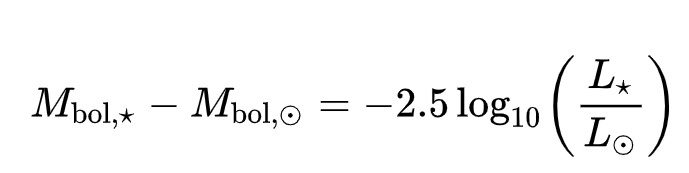

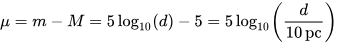

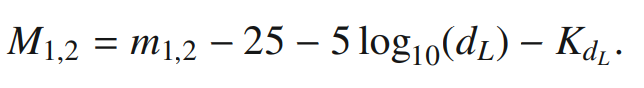

In [15]:
M_BOSS_dist_mod(2.2),m_app_BOSS(2.2)

(-24.5, 21.699749628076315)

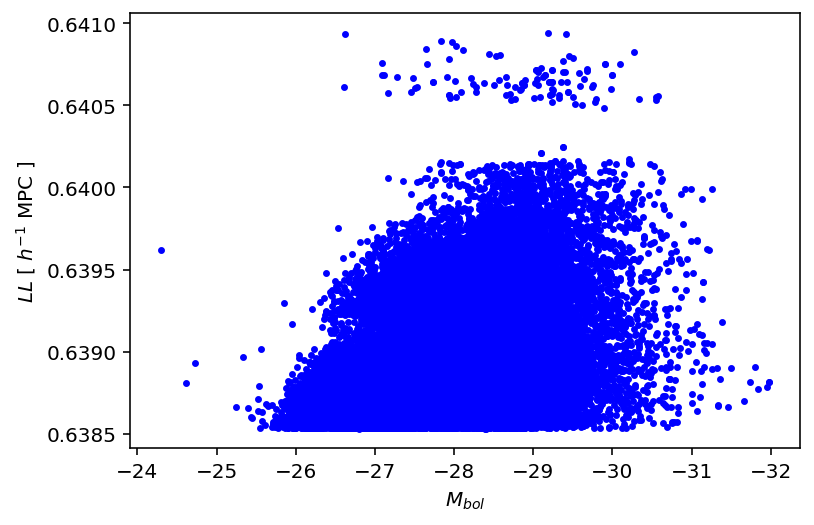

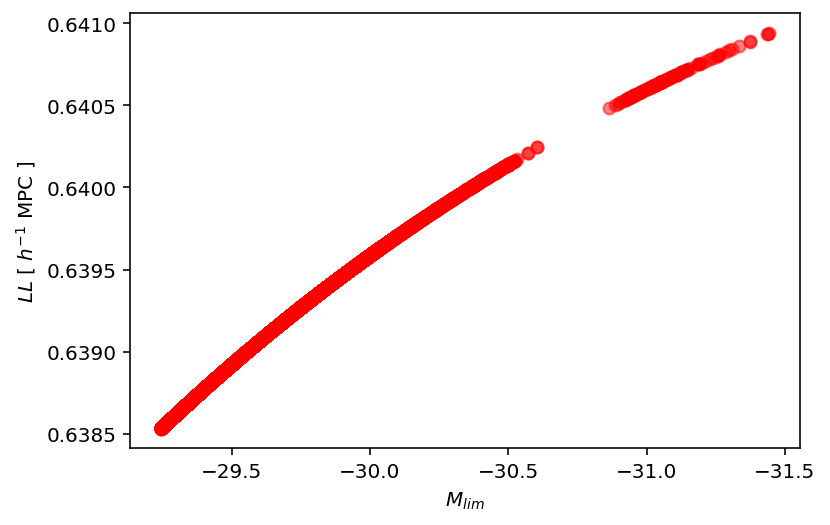

In [16]:
M_bol_L=[];M_lim_L=[];LL_2010=[];
for i in range(len(df)):
    M_bol_L.append(M_bol(df['log_lbol'][i]))
    M_lim_L.append(M_dist_mod(df['z'][i]))
    LL_2010.append(L_L(df['z'][i]))
df['M_bol_2010_tot']=M_bol_L
df['M_lim_2010_tot']=M_lim_L
df['L_L']=LL_2010
plt.scatter(df['M_bol_2010_tot'],LL_2010,c='b',s=6)
plt.ylabel('$LL$ [ $h^{-1}$ MPC ]');plt.xlabel('$M_{bol}$');plt.gca().invert_xaxis()
plt.show()
plt.scatter(M_lim_L,LL_2010,c='r',alpha=0.5)
plt.ylabel('$LL$ [ $h^{-1}$ MPC ]');plt.xlabel('$M_{lim}$');plt.gca().invert_xaxis()
plt.show()

In [17]:
z_2010=[];lbol_2010=[];mass_2010=[];edd_2010=[];M_bol_2010=[];M_lim_2010=[];dist_2010=[];name_2010=[];
for i in range(len(df)):
    if M_bol(df['log_lbol'][i]) < M_dist_mod(df['z'][i]): #throw away fluxes out of touch
        z_2010.append(df['z'][i])
        lbol_2010.append(df['log_lbol'][i])
        mass_2010.append(df['log_bh'][i])
        edd_2010.append(df['log_edd_ratio'][i])
        M_bol_2010.append(M_bol(df['log_lbol'][i]))
        M_lim_2010.append(M_dist_mod(df['z'][i]))
        dist_2010.append(DLflat(df['z'][i]))
        name_2010.append(df['name'][i])    

In [18]:
z_BOSS=[];lbol_BOSS=[];mass_BOSS=[];edd_BOSS=[];m_app_bol_BOSS=[];dist_BOSS=[];
m_app_lim_BOSS=[];M_bol_BOSS=[];M_lim_list_BOSS=[];name_BOSS=[];
for i in range(len(df)):
    if M_bol(df['log_lbol'][i]) < M_BOSS_dist_mod(df['z'][i]):
        z_BOSS.append(df['z'][i])
        lbol_BOSS.append(df['log_lbol'][i])
        mass_BOSS.append(df['log_bh'][i])
        edd_BOSS.append(df['log_edd_ratio'][i])
        m_app_bol_BOSS.append(m_app_bol(df['log_lbol'][i],df['z'][i]))
        m_app_lim_BOSS.append(m_app_BOSS(df['z'][i]))
        M_bol_BOSS.append(M_bol(df['log_lbol'][i]))
        M_lim_list_BOSS.append(M_BOSS_dist_mod(df['z'][i]))
        dist_BOSS.append(DLflat(df['z'][i]))
        name_BOSS.append(df['name'][i])       

In [19]:
df_flux=pd.DataFrame({})
df_flux['name']=name_2010;df_flux['z']=z_2010;df_flux['log_bh']=mass_2010;
df_flux['log_lbol']=lbol_2010;df_flux['log_edd_ratio']=edd_2010;
df_flux['M_bol_2010']=M_bol_2010;df_flux['M_lim_2010']=M_lim_2010;df_flux['dist']=dist_2010;
flux_M_bol_L=[];flux_M_lim_L=[];flux_LL_2010=[];
for i in range(len(df_flux)):
    flux_LL_2010.append(L_L(df_flux['z'][i]))
df_flux['L_L']=flux_LL_2010
df_flux_sort=df_flux.sort_values('z').reset_index(drop=True)
df_flux_sort

,name,z,log_bh,log_lbol,log_edd_ratio,M_bol_2010,M_lim_2010,dist,L_L
0,2MASS J14464478+3426105,3.0006,10.275570,47.403779,-0.972162,-29.764297,-29.244100,25282.499612,0.638534
1,SDSS J122729.87-003410.6,3.0030,9.864000,47.258000,-0.706000,-29.399850,-29.246184,25306.770738,0.638537
2,2MASS J13155042+4635374,3.0030,9.619000,47.548000,-0.171000,-30.124850,-29.246184,25306.770738,0.638537
3,[HB89] 1429+118,3.0030,9.872000,47.478000,-0.494000,-29.949850,-29.246184,25306.770738,0.638537
4,SDSS J104909.81+373759.0,3.0030,9.696000,47.433000,-0.363000,-29.837350,-29.246184,25306.770738,0.638537
...,...,...,...,...,...,...,...,...,...
1204,WISE J155426.10+193703.0,4.6120,10.291000,47.865000,-0.526000,-30.917350,-30.353207,42134.851242,0.639989
1205,SDSS J165436.80+222733.0,4.6975,10.195813,47.744723,-0.551460,-30.616659,-30.400101,43054.656368,0.640038
1206,2MASS J14335216+0227135,4.7214,10.802169,47.746767,-1.155773,-30.621767,-30.413049,43312.150001,0.640052
1207,SDSS J0946+1835,4.7992,10.633799,47.740504,-0.993666,-30.606109,-30.454728,44151.511671,0.640095


In [20]:
df_BOSS=pd.DataFrame({})
df_BOSS['name']=name_BOSS
df_BOSS['z']=z_BOSS;df_BOSS['log_bh']=mass_BOSS;df_BOSS['log_lbol']=lbol_BOSS;df_BOSS['log_edd_ratio']=edd_BOSS;
df_BOSS['m_app_bol']=m_app_bol_BOSS;df_BOSS['m_app_lim']=m_app_lim_BOSS;
df_BOSS['M_bol']=M_bol_BOSS;df_BOSS['M_abs_lim']=M_lim_list_BOSS;df_BOSS['dist']=dist_BOSS;
BOSS_LL=[];
for i in range(len(df_BOSS)):
    BOSS_LL.append(L_L(df_BOSS['z'][i]))
df_BOSS['L_L']=BOSS_LL
df_BOSS_sort=df_BOSS.sort_values('z').reset_index(drop=True)
df_BOSS_sort

,name,z,log_bh,log_lbol,log_edd_ratio,m_app_bol,m_app_lim,M_bol,M_abs_lim,dist,L_L
0,SDSS J092247.81+532146.8,3.0003,9.603873,46.853594,-0.850649,18.625004,22.513839,-28.388835,-25.314090,25279.464097,0.638533
1,SDSS J022345.41-003235.6,3.0003,9.396350,46.217390,-1.279330,20.215515,22.513839,-26.798325,-25.314090,25279.464097,0.638533
2,SDSS J095107.17+352255.4,3.0004,9.604171,46.860692,-0.843849,18.607346,22.513926,-28.406581,-25.314177,25280.476725,0.638533
3,SDSS J091748.33+155338.8,3.0005,9.712263,47.055201,-0.757432,18.121160,22.514013,-28.892853,-25.314263,25281.486963,0.638533
4,SDSS J124359.54+633606.9,3.0006,9.334210,46.912535,-0.522045,18.477912,22.514100,-28.536188,-25.314350,25282.499612,0.638534
...,...,...,...,...,...,...,...,...,...,...,...
34217,VIKING J010953.13-304726.3,6.7909,9.123852,46.707570,-0.537602,21.078601,24.602376,-28.023775,-27.402627,66141.687025,0.640858
34218,VIKING J234833.34-305410.0,6.9000,9.322219,46.684935,-0.744727,21.175141,24.642329,-27.967188,-27.442579,67369.886603,0.640888
34219,VIKING J234833.34-305410.0,6.9018,9.296665,46.633468,-0.769551,21.304462,24.642983,-27.838521,-27.443233,67390.167868,0.640888
34220,ULAS J1120+0641,7.0842,9.392697,47.262451,-0.244125,19.797329,24.708307,-29.410978,-27.508557,69448.252654,0.640935


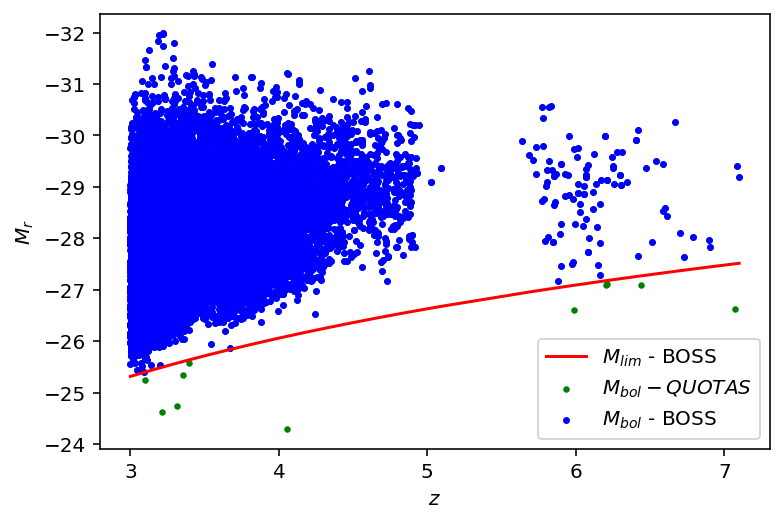

In [21]:
df_2010_sort=df.sort_values('z')
dist = df_2010_sort['z']*H0
M_bol_y= df_2010_sort['M_bol_2010_tot'].values
M_lim_y = df_2010_sort['M_lim_2010_tot'].values
red_shift = df_2010_sort['z'].values
z=np.arange(0.2,7,0.1)
plt.scatter(red_shift,M_bol_y,c='g',label='$M_{bol} - QUOTAS$',s=5)
plt.scatter(df_BOSS_sort['z'],df_BOSS_sort['M_bol'],c='b',label='$M_{bol}$ - BOSS',s=6)
plt.plot(df_BOSS_sort['z'],df_BOSS_sort['M_abs_lim'],c='r',label='$M_{lim}$ - BOSS')
plt.ylabel('$M_r$')
plt.xlabel('$z$')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

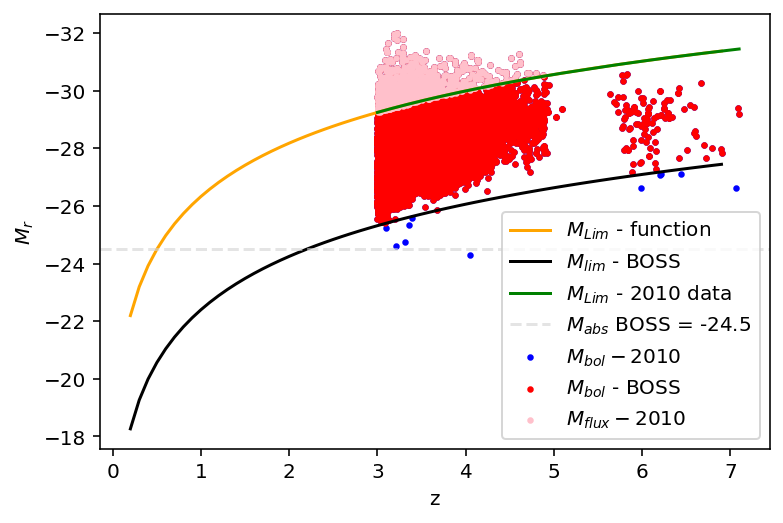

34233 34222


In [22]:
df_2010_sort=df.sort_values('z')
dist = df_2010_sort['z']*H0
M_bol_y= df_2010_sort['M_bol_2010_tot'].values
M_lim_y = df_2010_sort['M_lim_2010_tot'].values
red_shift = df_2010_sort['z'].values
z=np.arange(0.2,7,0.1)
M_dist_list=[];
M_BOSS_dist_list=[];
for i in range(len(z)):
    M_dist_list.append(M_dist_mod(z[i]))
    M_BOSS_dist_list.append(M_BOSS_dist_mod(z[i]))
plt.plot(z,M_dist_list,c='orange',label='$M_{Lim}$ - function')
plt.scatter(red_shift,M_bol_y,c='b',label='$M_{bol} - 2010$',s=5)
plt.scatter(df_BOSS_sort['z'],df_BOSS_sort['M_bol'],c='r',label='$M_{bol}$ - BOSS',s=5)
plt.scatter(df_flux_sort['z'],df_flux_sort['M_bol_2010'],c='pink',label='$M_{flux} - 2010$',s=5)
plt.plot(z,M_BOSS_dist_list,c='black',label='$M_{lim}$ - BOSS')
plt.plot(red_shift,M_lim_y,c='g',label='$M_{Lim}$ - 2010 data')
plt.axhline(-24.5, 0, max(red_shift),c='lightgrey',alpha=0.6,linestyle='--',label='$M_{abs}$ BOSS = -24.5')
plt.legend()
plt.ylabel('$M_r$')
plt.xlabel('z')
plt.gca().invert_yaxis()
# plt.savefig('Mr_VS_z_BOSS_2010_1350.jpg',dpi=600)
plt.show()
print(len(df_2010_sort),len(df_BOSS_sort))

# Volume limited:

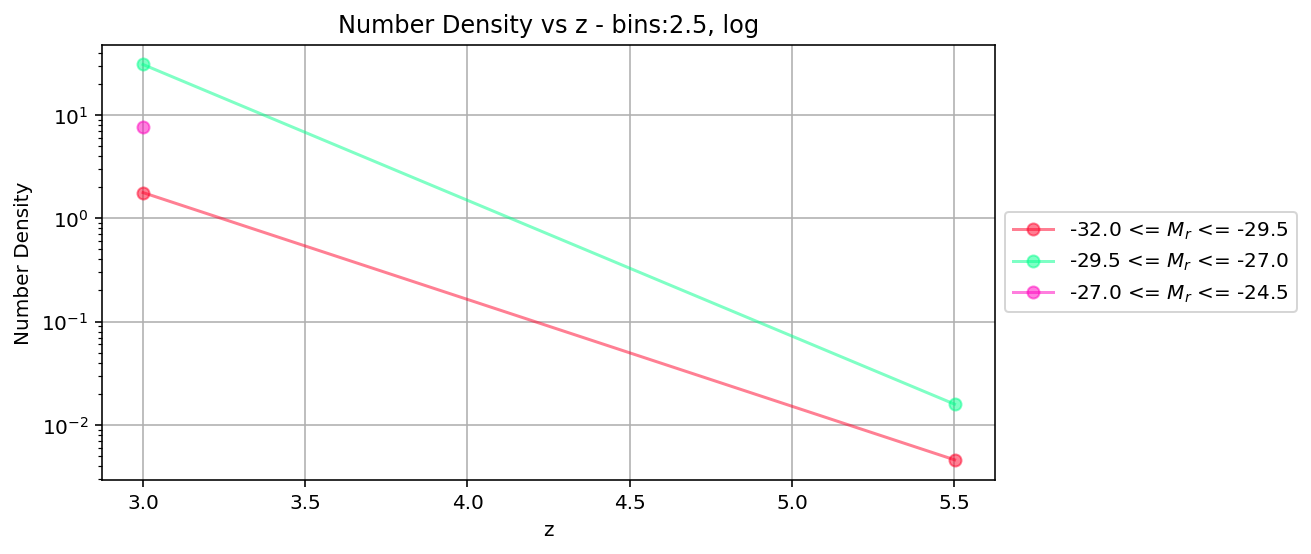

In [23]:
range_num=3
bin_width=2.5
dfz = [[] for _ in range(range_num)]
for i in range(len(df_BOSS)): #for 0.5
    for j in range(0, range_num):
        if -32+bin_width*(j) <= df_BOSS['M_bol'][i] <= -32 + bin_width*(j+1):
            dfz[j].append(df_BOSS['z'][i])

def calculate_number_density(distances, bin_width):
    bins = np.arange(min(distances, default=0), max(distances, default=0) + bin_width, bin_width)
    hist, r_array = np.histogram(distances, bins)
    dR = r_array[1]-r_array[0]    
    x_array = r_array[1:] - dR
    volume =  [4.*np.pi*i**3. for i in x_array[:] ]

    return [x_array, hist/dR/volume]

distances = [dfz[i] for i in range(range_num)]
bins, number_density = [], []
for i in range(range_num):
    b, n = calculate_number_density(dfz[i], bin_width)
    bins.append(b)
    number_density.append(n)
    
plt.figure(figsize=(8, 4))
hsv = plt.get_cmap('gist_rainbow')
colors = hsv(np.linspace(0, 1.0, range_num))
labels = []
for j in range(range_num):
    labels.append(f'{-32 + (j*bin_width) } <= $M_r$ <= {-32 + bin_width*(j+1)}')
for i in range(range_num):
    plt.plot(bins[i], number_density[i], marker='o', c=colors[i], alpha=0.5, label=labels[i])
# plt.xlabel('Distance [$h^{-1}$ MPC]')
plt.xlabel('z')
plt.ylabel('Number Density')
plt.title('Number Density vs z - bins:{}, log'.format(bin_width))
plt.grid(True)
plt.yscale('log') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# filename = 'ND_Vs_z_bins_{}.jpg'.format(bin_width)
# plt.savefig(filename,dpi=600)
plt.show()

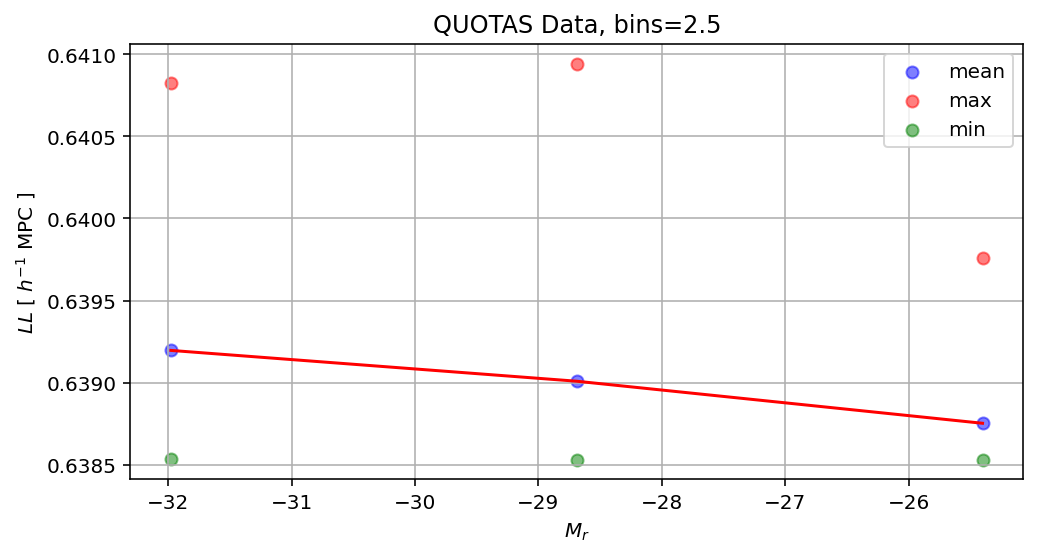

In [24]:
df_BOSS_sort_bol=df_BOSS.sort_values('M_bol')
x = df_BOSS_sort_bol['M_bol'].values
y = df_BOSS_sort_bol['L_L'].values

bins = np.arange(min(x), max(x) + bin_width, bin_width)
binned_x = pd.cut(x, bins=bins)
groups = pd.DataFrame({'y': y}).groupby(binned_x).mean()
groupsmax = pd.DataFrame({'ymax': y}).groupby(binned_x).max()
groupsmin = pd.DataFrame({'ymin': y}).groupby(binned_x).min()
xgr=np.linspace(min(x),max(x),len(groups)).round(2)
fig=plt.figure(figsize=(8, 4))
plt.scatter(xgr, groups['y'],c='b',label='mean',alpha=0.5)
plt.scatter(xgr, groupsmax['ymax'],c='r',label='max',alpha=0.5)
plt.scatter(xgr, groupsmin['ymin'],c='g',label='min',alpha=0.5)
plt.plot(xgr, groups['y'],c='r')
plt.legend()
plt.grid(True)
plt.title('QUOTAS Data, bins={}'.format(bin_width))
plt.ylabel('$LL$ [ $h^{-1}$ MPC ]')
plt.xlabel('$M_r$')
# filename = 'LL_Vs_Mr_bins_{}.jpg'.format(bin_width)
# plt.savefig(filename,dpi=600)
plt.show()

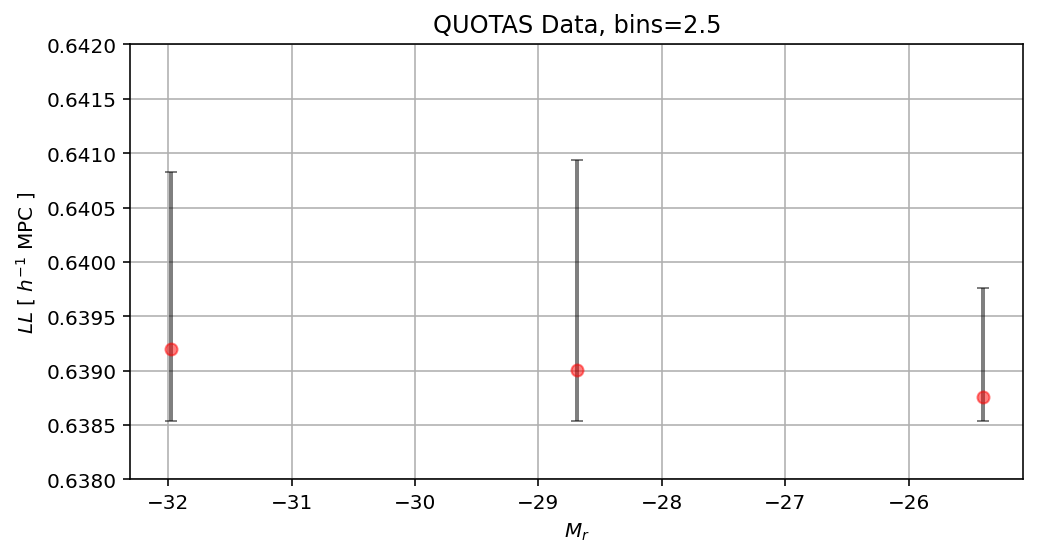

In [25]:
err = [groups['y']-groupsmin['ymin'],-groups['y']+groupsmax['ymax']]
fig=plt.figure(figsize=(8, 4))
plt.errorbar(xgr,groups['y'], yerr=err,c='red',fmt='o',ecolor='black', alpha=0.5, elinewidth=2, capsize=3,linestyle='none')
plt.grid(True)
plt.title('QUOTAS Data, bins={}'.format(bin_width))
plt.ylabel('$LL$ [ $h^{-1}$ MPC ]')
plt.xlabel('$M_r$')
plt.ylim(0.638,0.642)
# filename = 'LL_Vs_Mr_err_bins_{}.jpg'.format(bin_width)
# plt.savefig(filename,dpi=600)
plt.show()

## When Solved with Python

In [30]:
bin_num=2.55
M_dist =-1*np.arange( -int(max(df_BOSS['M_bol'])),-int(min(df_BOSS['M_bol']))  , bin_num)
def func(z,M):
    return M_BOSS_dist_mod(z) - M
zfs=[];Mfs=[];
for i in range(len(M_dist)):
    zfs.append(fsolve(func,1,M_dist[i])[0])
    Mfs.append(M_dist[i])
df_dis=pd.DataFrame({})
df_dis['z']=zfs;df_dis['M_bol']=Mfs
df_dis

,z,M_bol
0,2.660521,-25.00
1,7.202528,-27.55
2,20.439604,-30.10


In [31]:
z_vol=[];Mbol_vol=[];log_bh_vol=[];
for i in range(len(df_dis)):
    for j in range(len(df_BOSS)):
        if df_BOSS['M_bol'][j]<=df_dis['M_bol'][i]:
            if df_BOSS['z'][j]<=df_dis['z'][i]:
                z_vol.append(df_BOSS['z'][j])
                Mbol_vol.append(df_BOSS['M_bol'][j])  
                log_bh_vol.append(df_BOSS['log_bh'][j])
df_vol=pd.DataFrame({})
df_vol['z']=z_vol;df_vol['M_bol']=Mbol_vol;df_vol['log_bh']=log_bh_vol;
df_vol=df_vol.reset_index(drop=True)
df_vol=df_vol.drop_duplicates().reset_index(drop=True)
df_BOSS=df_BOSS.reset_index(drop=True)
result =pd.merge(df_BOSS,df_vol, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1).reset_index(drop=True)
len(df_BOSS),len(df_vol),len(result)

(34222, 21193, 13029)

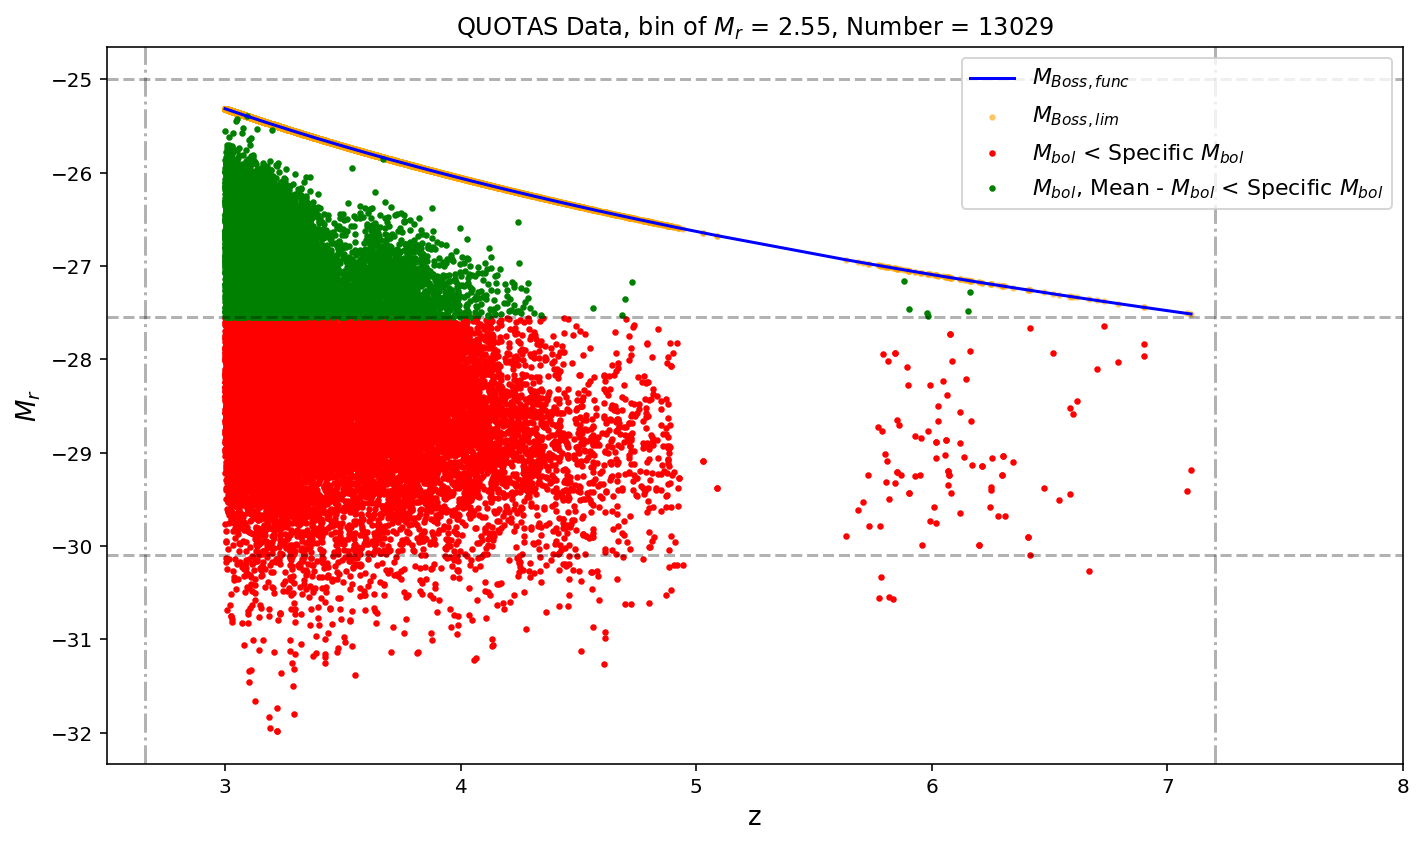

In [32]:
x = df_BOSS_sort['z'];y = df_BOSS_sort['M_bol'];mlim=df_BOSS_sort['M_abs_lim']
# bin_num=0.1
fig,ax= plt.subplots(figsize=(10, 6))
for i in range(len(df_dis)):
    plt.axvline(df_dis['z'][i], 0, max(x),c='black',linestyle='-.',alpha=0.3)
    plt.axhline(df_dis['M_bol'][i], 0, max(x),c='black',linestyle='--',alpha=0.3)
M_Boss_list=[];
for i in range(len(x)):
    M_Boss_list.append(M_BOSS_dist_mod(x[i]))
plt.plot(x, M_Boss_list,c='b',label='$M_{Boss,func}$')
plt.scatter(x,mlim,c='orange',label='$M_{Boss,lim}$',alpha=0.5,s=5)
plt.scatter(df_vol['z'],df_vol['M_bol'],s=5,c='r',label='$M_{bol}$ < Specific $M_{bol}$')
plt.scatter(result['z'],result['M_bol'],s=5,c='g',label='$M_{bol}$, Mean - $M_{bol}$ < Specific $M_{bol}$')
plt.xlim(2.5,8)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=11)
plt.legend(loc='upper right',fontsize=11)
# plt.grid(True)
# plt.ylim(-33,-24)
plt.title('QUOTAS Data, bin of $M_r$ = {}, Number = {}'.format((bin_num),len(result)))
# plt.xlabel('Distance [$h^{-1}$ MPC]',size=13)
plt.xlabel('z',size=13)
plt.ylabel('$M_r$',size=13)
plt.tight_layout()
# plt.gca().invert_yaxis()
plt.show()

In [33]:
z_res = {}
for i in range(len(df_dis) - 1):
    for j in range(len(result) - 1):
        if df_dis['M_bol'][i+1]<=result['M_bol'][j]<=df_dis['M_bol'][i]:
            if df_dis['z'][i] <= result['z'][j] <= df_dis['z'][i + 1]:
                condition_key = (df_dis['z'][i], df_dis['z'][i + 1])
                if condition_key not in z_res:
                    z_res[condition_key] = []
                z_res[condition_key].append(result['z'][j])
z_res_list = list(z_res.values())
for i, z_list in enumerate(z_res_list):
    print(f"Num in subsample {i+1}: {len(z_list)}")

Num in subsample 1: 13028


----